# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import api_keys
import json
import requests
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
from api_keys import weather_api_key, g_key
import pandas as pd

# importing citipy to look up nearest coordinates to a soon to be created random list of coords.
from citipy import citipy
data_output = ('Output/city_weather_data.csv')

## Generate Cities List

In [2]:
cords = []
city_list = []


# Creating lists for coordinates, keeping separate to keep list of cities the same
lat = np.random.uniform(low=-90.000, high=90.000, size=2000)
lng = np.random.uniform(low=-180.000, high=180.000, size=2000)

#combines above numbers together in cords, creates a coordinate list
cords = zip(lat,lng)

# Finding nearest city with each lat/lng combo
for cord in cords:
    city = citipy.nearest_city(cord[0], cord[1]).city_name
    # Adds only unique cities to city_list
    if city not in city_list:
        city_list.append(city)
# Setting this for a progress bar later on
num_cities = len(city_list)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Creating lists to store api request info in
lat = []
lng = []
temp_high = []
temp_low = []
feels_like = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
city_id = []

#Creating base url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#Setting units, change this to get different units
units = 'imperial'
# Query URL
cord_query_url = f"{url}&units={units}&appid={weather_api_key}&q="



# Getting data and appending to list, will run in a for loop
for count, place in enumerate(city_list, start=1):
    try:
        
        print(f'Working on getting data for "{place.title()}"". This is city #: {count} of {num_cities}')
        weather_response = requests.get(cord_query_url + place).json()
        # appends lists above with information from .get()
        lat.append(weather_response["coord"]['lat'])
        lng.append(weather_response["coord"]["lon"])
        temp_high.append(weather_response["main"]["temp_max"])
        temp_low.append(weather_response["main"]["temp_min"])
        feels_like.append(weather_response["main"]["feels_like"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        city_id.append(weather_response["sys"]["id"])
    # Throws out any key errors and keeps going, prints statements to let you know it couldnt find city
    except(KeyError):
        print(f'"{place.title()}" Not Found')
        print("---------------")
# Shows how many cities were pulled from total list of cities and updates when finished running
print("-------------------------------------------------------------------------------")
print(f'We were only able to find {len(city_name)} of {num_cities} cities')
print("-------------------------------------------------------------------------------")
print("Data Collection has completed")

Working on getting data for "Tual"". This is city #: 1 of 786
"Tual" Not Found
---------------
Working on getting data for "Mys Shmidta"". This is city #: 2 of 786
"Mys Shmidta" Not Found
---------------
Working on getting data for "Nizhneyansk"". This is city #: 3 of 786
"Nizhneyansk" Not Found
---------------
Working on getting data for "Taolanaro"". This is city #: 4 of 786
"Taolanaro" Not Found
---------------
Working on getting data for "Hermanus"". This is city #: 5 of 786
Working on getting data for "Morant Bay"". This is city #: 6 of 786
"Morant Bay" Not Found
---------------
Working on getting data for "Namibe"". This is city #: 7 of 786
"Namibe" Not Found
---------------
Working on getting data for "Severo-Kurilsk"". This is city #: 8 of 786
"Severo-Kurilsk" Not Found
---------------
Working on getting data for "Zarechnyy"". This is city #: 9 of 786
"Zarechnyy" Not Found
---------------
Working on getting data for "Tasiilaq"". This is city #: 10 of 786
Working on getting data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [6]:
# Creating DF with the above API Calls
weather_data = pd.DataFrame({"City": city_name,
                            "Country": country,
                            "Latitude": lat,
                            "Longitude": lng,
                            "Temperature High": temp_high,
                            "Temperature Low": temp_low,
                            "Feels Like Temp.": feels_like,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
})
# Exports file to csv
weather_data.to_csv(data_output)
weather_data['Humidity'] = pd.to_numeric(weather_data['Cloudiness'])
# Displays DF
weather_data.head()

,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed
0,Tual,ID,-5.6667,132.7500,80.11,80.11,84.47,37,37,20.85
1,Hermanus,ZA,-34.4187,19.2345,48.90,43.81,39.83,8,8,6.82
2,Morant Bay,JM,17.8815,-76.4093,84.88,84.88,93.58,12,12,15.73
3,Mossamedes,AO,-15.1961,12.1522,64.87,64.87,65.14,13,13,7.49
4,Severo-Kuril'sk,RU,50.6789,156.1250,50.02,50.02,49.08,16,16,4.52


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Empty list to store all cities with humidity over 100
high_humidity_list = []
high_humidity = []


# Locates any row wih humidity over 100, stores 
high_humidity = weather_data[weather_data["Humidity"] > 100]
high_humidity_list.append(high_humidity)
high_humidity_length = len(high_humidity)

# drops all rows where Humidity is over 100
weather_data.drop(weather_data.loc[weather_data["Humidity"] > 100].index, inplace=True)

# Checks length of humidity list
if high_humidity_length > 0:
    #If more than 0 entries it will print below line
    print(f'There are {high_humidity_length} cities with humidity over 100%')
else:
    #If no entries in high_humidity_length it will print below line
    print("No Cities in this list have humidity above 100%")

high_humidity.head(5)

No Cities in this list have humidity above 100%


,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

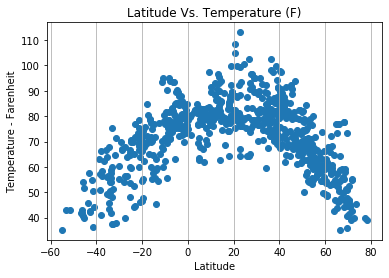

In [8]:
# Creating Scatter plot 
plt.scatter(lat,temp_high)
plt.xlabel("Latitude")
plt.ylabel("Temperature - Farenheit")
plt.grid(axis="x")
plt.title("Latitude Vs. Temperature (F)")
plt.savefig("Images/Latitudevstemp.jpg")

## Latitude vs. Humidity Plot

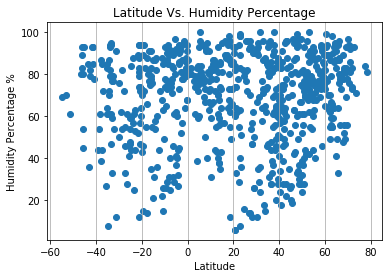

In [9]:
# Creating Scatter plot 
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage %")
plt.grid(axis="x")
plt.title("Latitude Vs. Humidity Percentage")
plt.savefig("Images/Humidity.jpg")

## Latitude vs. Cloudiness Plot

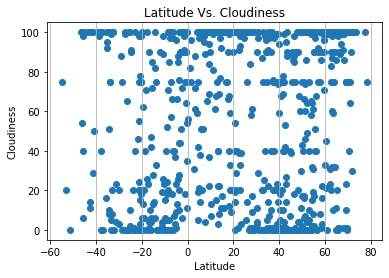

In [10]:
# Creating Scatter plot 
plt.scatter(lat,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(axis="x")
plt.title("Latitude Vs. Cloudiness")
plt.savefig("Images/Latitudevscloudiness.jpg")

## Latitude vs. Wind Speed Plot

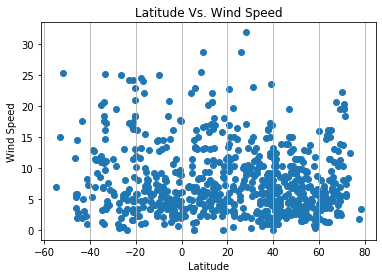

In [11]:
# Creating Scatter plot 
plt.scatter(lat,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(axis="x")
plt.title("Latitude Vs. Wind Speed")
plt.savefig("Images/Latitudevswindspeed.jpg")

## Linear Regression

In [15]:
# Creating DF's for northern and southern hemispheres
northern_hemisphere = weather_data[weather_data["Latitude"] >= 0] 
southern_hemisphere = weather_data[weather_data["Latitude"] < 0] 

In [16]:
lin_eq_list = []

# Creating a function to pass in attributes i.e.(Latitude, windspeed, temp, and others). It then creates a graph and linear regression based on data
def lin_regress(att1,att2):
    print("Beginning calculations")
    print(f"The Pearson r-squared is : {round(st.pearsonr(att1, att2)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(att1, att2)
    print("Linear regression calculated!")
    regress_values = att1 * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The equation for the line of best fit is: {line_eq}')
    plt.scatter(att1, att2, c=point_color, zorder=1)
    plt.plot(att1,regress_values,line_color, zorder=2)
    lin_eq_list.append(line_eq)
    return line_eq

# Annotates the linear regression from above on the graph, x_values and y
def annotate(line_eq, x_axis, y_axis):
    line_eq
    plt.annotate(line_eq,(x_axis,y_axis),fontsize=font_size,color=equation_color,weight="bold")
    
# Function used to run both functions above and combine variables set, inputs are the two data sets we need to measure ex: Lat vs Temp
def main(att1, att2):
    lin_regress(att1, att2)
    annotate(lin_eq_list[0],x_axis,y_axis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.669
Linear regression calculated!
The equation for the line of best fit is: y = -0.47x + 91.79


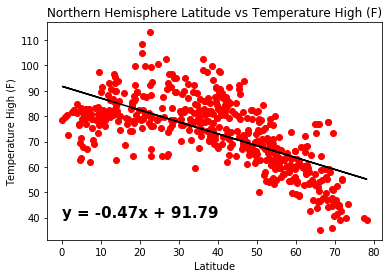

In [17]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 0
y_axis = 40
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Temperature High"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Temperature High (F)')
plt.xlabel("Latitude")
plt.ylabel("Temperature High (F)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Temperature High (F).jpg')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : 0.779
Linear regression calculated!
The equation for the line of best fit is: y = 0.8x + 82.35


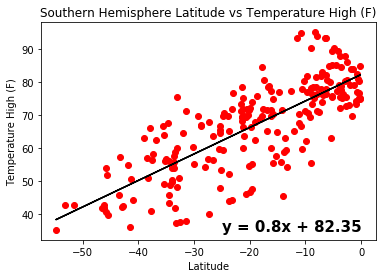

In [25]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -25
y_axis = 35
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Temperature High"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Temperature High (F)')
plt.xlabel("Latitude")
plt.ylabel("Temperature High (F)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Temperature High (F).jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.03
Linear regression calculated!
The equation for the line of best fit is: y = -0.06x + 57.46


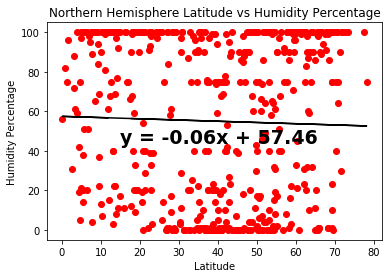

In [29]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 15
y_axis = 44
font_size = 19
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Humidity Percentage')
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Humidity Percentage.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.057
Linear regression calculated!
The equation for the line of best fit is: y = -0.17x + 44.71


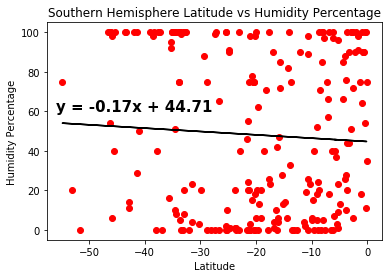

In [31]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -56
y_axis = 60
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Humidity Percentage')
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Humidity Percentage.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.03
Linear regression calculated!
The equation for the line of best fit is: y = -0.06x + 57.46


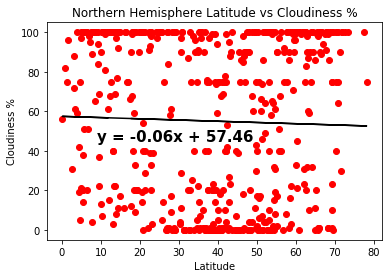

In [34]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 9
y_axis = 45
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Cloudiness %')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Cloudiness %.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.057
Linear regression calculated!
The equation for the line of best fit is: y = -0.17x + 44.71


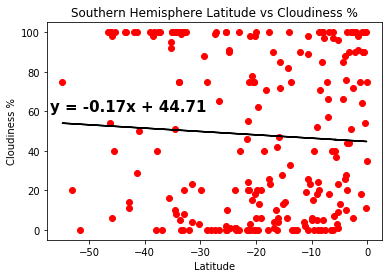

In [36]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -57
y_axis = 60
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Cloudiness %')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Cloudiness %.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.03
Linear regression calculated!
The equation for the line of best fit is: y = -0.06x + 57.46


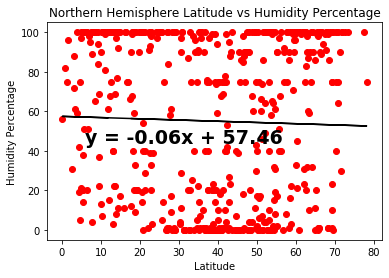

In [41]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 6
y_axis = 44
font_size = 19
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.title(f'{hemisphere} Hemisphere Latitude vs Humidity Percentage')
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Humidity Percentage.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.153
Linear regression calculated!
The equation for the line of best fit is: y = -0.07x + 6.84


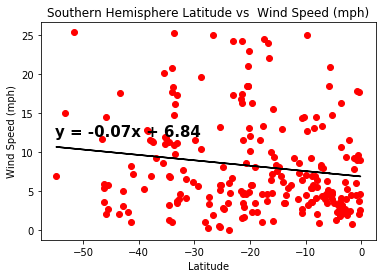

In [45]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -55
y_axis = 12
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.title(f'{hemisphere} Hemisphere Latitude vs  Wind Speed (mph)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Wind Speed (mph).jpg')